# Intro

[PyTorch](https://pytorch.org/) is a very powerful machine learning framework. Central to PyTorch are [tensors](https://pytorch.org/docs/stable/tensors.html), a generalization of matrices to higher ranks. One intuitive example of a tensor is an image with three color channels: A 3-channel (red, green, blue) image which is 64 pixels wide and 64 pixels tall is a $3\times64\times64$ tensor. You can access the PyTorch framework by writing `import torch` near the top of your code, along with all of your other import statements.

This guide will help introduce you to the functionality of PyTorch, but don't worry too much about memorizing it: the assignments will link to relevant documentation where necessary.

In [1]:
import torch

# Why PyTorch?

One important question worth asking is, why is PyTorch being used for this course? There is a great breakdown by [the Gradient](https://thegradient.pub/state-of-ml-frameworks-2019-pytorch-dominates-research-tensorflow-dominates-industry/) looking at the state of machine learning frameworks today. In part, as highlighted by the article, PyTorch is generally more pythonic than alternative frameworks, easier to debug, and is the most-used language in machine learning research by a large and growing margin. While PyTorch's primary alternative, Tensorflow, has attempted to integrate many of PyTorch's features, Tensorflow's implementations come with some inherent limitations highlighted in the article.

Notably, while PyTorch's industry usage has grown, Tensorflow is still (for now) a slight favorite in industry. In practice, the features that make PyTorch attractive for research also make it attractive for education, and the general trend of machine learning research and practice to PyTorch makes it the more proactive choice. 

# Tensor Properties
One way to create tensors from a list or an array is to use `torch.Tensor`. It'll be used to set up examples in this notebook, but you'll never need to use it in the course - in fact, if you find yourself needing it, that's probably not the correct answer.   
https://www.tensorflow.org/guide/tensor

In [2]:
example_tensor = torch.Tensor(
    [
     [[1, 2], [3, 4]], 
     [[5, 6], [7, 8]], 
     [[9, 0], [1, 2]]
    ]
)

You can view the tensor in the notebook by simple printing it out (though some larger tensors will be cut off)

In [3]:
example_tensor

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]],

        [[9., 0.],
         [1., 2.]]])

## Tensor Properties: Device

One important property is the device of the tensor - throughout this notebook you'll be sticking to tensors which are on the CPU. However, throughout the course you'll also be using tensors on GPU (that is, a graphics card which will be provided for you to use for the course). To view the device of the tensor, all you need to write is `example_tensor.device`. To move a tensor to a new device, you can write `new_tensor = example_tensor.to(device)` where device will be either `cpu` or `cuda`.

In [4]:
example_tensor.device

device(type='cpu')

## Tensor Properties: Shape

And you can get the number of elements in each dimension by printing out the tensor's shape, using `example_tensor.shape`, something you're likely familiar with if you've used numpy. For example, this tensor is a $3\times2\times2$ tensor, since it has 3 elements, each of which are $2\times2$. 

In [5]:
example_tensor.shape

torch.Size([3, 2, 2])

You can also get the size of a particular dimension $n$ using `example_tensor.shape[n]` or equivalently `example_tensor.size(n)`

In [6]:
print("shape[0] =", example_tensor.shape[0])
print("size(1) =", example_tensor.size(1))

shape[0] = 3
size(1) = 2


Finally, it is sometimes useful to get the number of dimensions (rank) or the number of elements, which you can do as follows

In [7]:
print("Rank =", len(example_tensor.shape))
print("Number of elements =", example_tensor.numel())

Rank = 3
Number of elements = 12


# Indexing Tensors

As with numpy, you can access specific elements or subsets of elements of a tensor. To access the $n$-th element, you can simply write `example_tensor[n]` - as with Python in general, these dimensions are 0-indexed. 

In [8]:
example_tensor[1]

tensor([[5., 6.],
        [7., 8.]])

In addition, if you want to access the $j$-th dimension of the $i$-th example, you can write `example_tensor[i, j]`

In [9]:
example_tensor[1, 1, 0]

tensor(7.)

Note that if you'd like to get a Python scalar value from a tensor, you can use `example_scalar.item()`

In [10]:
example_scalar = example_tensor[1, 1, 0]
example_scalar.item()

7.0

In addition, you can index into the ith element of a column by using `x[:, i]`. For example, if you want the top-left element of each element in `example_tensor`, which is the `0, 0` element of each matrix, you can write:

In [11]:
example_tensor[:, 0, 0]

tensor([1., 5., 9.])

# Initializing Tensors

There are many ways to create new tensors in PyTorch, but in this course, the most important ones are: 

[`torch.ones_like`](https://pytorch.org/docs/master/generated/torch.ones_like.html): creates a tensor of all ones with the same shape and device as `example_tensor`.

In [12]:
torch.ones_like(example_tensor)

tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])

[`torch.zeros_like`](https://pytorch.org/docs/master/generated/torch.zeros_like.html): creates a tensor of all zeros with the same shape and device as `example_tensor`

In [13]:
torch.zeros_like(example_tensor)

tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])

[`torch.randn_like`](https://pytorch.org/docs/stable/generated/torch.randn_like.html): creates a tensor with every element sampled from a [Normal (or Gaussian) distribution](https://en.wikipedia.org/wiki/Normal_distribution) with the same shape and device as `example_tensor`


In [14]:
torch.randn_like(example_tensor)

tensor([[[-0.9929, -0.4744],
         [ 0.5644,  0.0631]],

        [[ 1.1137,  0.1305],
         [-0.6126, -0.4537]],

        [[ 1.1369, -0.9101],
         [-0.6287,  0.4644]]])

Sometimes (though less often than you'd expect), you might need to initialize a tensor knowing only the shape and device, without a tensor for reference for `ones_like` or `randn_like`. In this case, you can create a $2x2$ tensor as follows:

In [15]:
torch.randn(2, 2, device='cpu') # Alternatively, for a GPU tensor, you'd use device='cuda'

tensor([[ 0.2691, -0.9589],
        [-1.0303, -0.5413]])

# Basic Functions

There are a number of basic functions that you should know to use PyTorch - if you're familiar with numpy, all commonly-used functions exist in PyTorch, usually with the same name. You can perform element-wise multiplication / division by a scalar $c$ by simply writing `c * example_tensor`, and element-wise addition / subtraction by a scalar by writing `example_tensor + c`

Note that most operations are not in-place in PyTorch, which means that they don't change the original variable's data (However, you can reassign the same variable name to the changed data if you'd like, such as `example_tensor = example_tensor + 1`)

In [16]:
(example_tensor - 5) * 2

tensor([[[ -8.,  -6.],
         [ -4.,  -2.]],

        [[  0.,   2.],
         [  4.,   6.]],

        [[  8., -10.],
         [ -8.,  -6.]]])

You can calculate the mean or standard deviation of a tensor using [`example_tensor.mean()`](https://pytorch.org/docs/stable/generated/torch.mean.html) or [`example_tensor.std()`](https://pytorch.org/docs/stable/generated/torch.std.html). 

In [17]:
print("Mean:", example_tensor.mean())
print("Stdev:", example_tensor.std())

Mean: tensor(4.)
Stdev: tensor(2.9848)


You might also want to find the mean or standard deviation along a particular dimension. To do this you can simple pass the number corresponding to that dimension to the function. For example, if you want to get the average $2\times2$ matrix of the $3\times2\times2$ `example_tensor` you can write:

In [18]:
example_tensor.mean(0)

# Equivalently, you could also write:
# example_tensor.mean(dim=0)
# example_tensor.mean(axis=0)
# torch.mean(example_tensor, 0)
# torch.mean(example_tensor, dim=0)
# torch.mean(example_tensor, axis=0)

tensor([[5.0000, 2.6667],
        [3.6667, 4.6667]])

PyTorch has many other powerful functions but these should be all of PyTorch functions you need for this course outside of its neural network module (`torch.nn`).

# PyTorch Neural Network Module (`torch.nn`)

PyTorch has a lot of powerful classes in its `torch.nn` module (Usually, imported as simply `nn`). These classes allow you to create a new function which transforms a tensor in specific way, often retaining information when called multiple times.

In [19]:
import torch.nn as nn

## `nn.Linear`

To create a linear layer, you need to pass it the number of input dimensions and the number of output dimensions. The linear object initialized as `nn.Linear(10, 2)` will take in a $n\times10$ matrix and return an $n\times2$ matrix, where all $n$ elements have had the same linear transformation performed. For example, you can initialize a linear layer which performs the operation $y=xA^T+b$, where $A$ and $b$ are initialized randomly when you generate the [`nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) object. 

In [20]:
linear = nn.Linear(10, 2) # n*10 -> n*2
example_input = torch.randn(3, 10) # 3*10, n=3
example_output = linear(example_input) # 3*10 ~ 10*2 -> 3*2, A^T: 10*2
example_output

tensor([[ 0.1907, -0.3954],
        [ 0.0679, -0.3044],
        [ 0.2238, -0.6610]], grad_fn=<AddmmBackward0>)

## `nn.ReLU`

[`nn.ReLU()`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) will create an object that, when receiving a tensor, will perform a ReLU activation function. This will be reviewed further in lecture, but in essence, a ReLU non-linearity sets all negative numbers in a tensor to zero. In general, the simplest neural networks are composed of series of linear transformations, each followed by activation functions. 

In [21]:
relu = nn.ReLU()
relu_output = relu(example_output)
relu_output

tensor([[0.1907, 0.0000],
        [0.0679, 0.0000],
        [0.2238, 0.0000]], grad_fn=<ReluBackward0>)

## `nn.BatchNorm1d`

[`nn.BatchNorm1d`](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html) is a normalization technique that will rescale a batch of $n$ inputs to have a consistent mean and standard deviation between batches.  

As indicated by the `1d` in its name, this is for situations where you expect a set of inputs, where each of them is a flat list of numbers. In other words, each input is a vector, not a matrix or higher-dimensional tensor. For a set of images, each of which is a higher-dimensional tensor, you'd use [`nn.BatchNorm2d`](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html), discussed later on this page.

`nn.BatchNorm1d` takes an argument of the number of input dimensions of each object in the batch (the size of each example vector).

In [22]:
batchnorm = nn.BatchNorm1d(2)
batchnorm_output = batchnorm(relu_output)
batchnorm_output

tensor([[ 0.4461,  0.0000],
        [-1.3838,  0.0000],
        [ 0.9378,  0.0000]], grad_fn=<NativeBatchNormBackward0>)

## `nn.Sequential`

[`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) creates a single operation that performs a sequence of operations. For example, you can write a neural network layer with a batch normalization as

In [23]:
mlp_layer = nn.Sequential(
    nn.Linear(5, 2),
    nn.BatchNorm1d(2),
    nn.ReLU()
)

test_example = torch.randn(5,5) + 1
print("input: ")
print(test_example)
print("output: ")
print(mlp_layer(test_example))

input: 
tensor([[ 0.5672, -0.6414, -0.9962,  0.8023,  0.8682],
        [ 0.7914,  1.1158,  0.1866, -0.1971,  1.4149],
        [ 0.9102,  1.0817,  0.7441,  0.7139,  1.2083],
        [ 0.7049,  0.6081,  0.2002,  1.5161,  0.9719],
        [ 0.4152,  0.4225,  2.5707,  0.4705,  1.5044]])
output: 
tensor([[1.3931, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.6075],
        [0.8156, 0.3325],
        [0.0000, 1.1802]], grad_fn=<ReluBackward0>)


# Optimization

One of the most important aspects of essentially any machine learning framework is its automatic differentiation library. 

## Optimizers

To create an optimizer in PyTorch, you'll need to use the `torch.optim` module, often imported as `optim`. [`optim.Adam`](https://pytorch.org/docs/stable/optim.html#torch.optim.Adam) corresponds to the Adam optimizer. To create an optimizer object, you'll need to pass it the parameters to be optimized and the learning rate, `lr`, as well as any other parameters specific to the optimizer.

For all `nn` objects, you can access their parameters as a list using their `parameters()` method, as follows:

In [24]:
import torch.optim as optim
adam_opt = optim.Adam(mlp_layer.parameters(), lr=1e-1)

## Training Loop

A (basic) training step in PyTorch consists of four basic parts:


1.   Set all of the gradients to zero using `opt.zero_grad()`
2.   Calculate the loss, `loss`
3.   Calculate the gradients with respect to the loss using `loss.backward()`
4.   Update the parameters being optimized using `opt.step()`

That might look like the following code (and you'll notice that if you run it several times, the loss goes down):


In [25]:
train_example = torch.randn(100,5) + 1
adam_opt.zero_grad()

# We'll use a simple loss function of mean distance from 1
# torch.abs takes the absolute value of a tensor
cur_loss = torch.abs(1 - mlp_layer(train_example)).mean()

cur_loss.backward()
adam_opt.step()
print(cur_loss)

tensor(0.7910, grad_fn=<MeanBackward0>)


## `requires_grad_()`

You can also tell PyTorch that it needs to calculate the gradient with respect to a tensor that you created by saying `example_tensor.requires_grad_()`, which will change it in-place. This means that even if PyTorch wouldn't normally store a grad for that particular tensor, it will for that specified tensor. 

## `with torch.no_grad():`

PyTorch will usually calculate the gradients as it proceeds through a set of operations on tensors. This can often take up unnecessary computations and memory, especially if you're performing an evaluation. However, you can wrap a piece of code with `with torch.no_grad()` to prevent the gradients from being calculated in a piece of code. 


## `detach():`

Sometimes, you want to calculate and use a tensor's value without calculating its gradients. For example, if you have two models, A and B, and you want to directly optimize the parameters of A with respect to the output of B, without calculating the gradients through B, then you could feed the detached output of B to A. There are many reasons you might want to do this, including efficiency or cyclical dependencies (i.e. A depends on B depends on A).

# New `nn` Classes

You can also create new classes which extend the `nn` module. For these classes, all class attributes, as in `self.layer` or `self.param` will automatically treated as parameters if they are themselves `nn` objects or if they are tensors wrapped in `nn.Parameter` which are initialized with the class. 

The `__init__` function defines what will happen when the object is created. The first line of the init function of a class, for example, `WellNamedClass`, needs to be `super(WellNamedClass, self).__init__()`. 

The `forward` function defines what runs if you create that object `model` and pass it a tensor `x`, as in `model(x)`. If you choose the function signature, `(self, x)`, then each call of the forward function, gets two pieces of information: `self`, which is a reference to the object with which you can access all of its parameters, and `x`, which is the current tensor for which you'd like to return `y`.

One class might look like the following:

In [26]:
class ExampleModule(nn.Module):
    def __init__(self, input_dims, output_dims):
        super(ExampleModule, self).__init__()
        self.linear = nn.Linear(input_dims, output_dims)
        self.exponent = nn.Parameter(torch.tensor(1.))

    def forward(self, x):
        x = self.linear(x)

        # This is the notation for element-wise exponentiation, 
        # which matches python in general
        x = x ** self.exponent 
        
        return x

And you can view its parameters as follows

In [27]:
example_model = ExampleModule(10, 2)
list(example_model.parameters())

[Parameter containing:
 tensor(1., requires_grad=True),
 Parameter containing:
 tensor([[ 7.7458e-02,  1.5494e-04,  2.7401e-01, -1.3910e-01, -1.6898e-01,
           1.9967e-01, -1.9099e-01,  1.4207e-01,  7.4589e-02,  1.8260e-01],
         [-5.6822e-02, -2.5284e-02, -3.0017e-01, -1.0479e-01,  9.4376e-02,
          -2.5613e-01,  1.5828e-01, -1.0356e-01,  1.8576e-01,  1.3774e-01]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0409,  0.0477], requires_grad=True)]

And you can print out their names too, as follows:

In [28]:
list(example_model.named_parameters())

[('exponent',
  Parameter containing:
  tensor(1., requires_grad=True)),
 ('linear.weight',
  Parameter containing:
  tensor([[ 7.7458e-02,  1.5494e-04,  2.7401e-01, -1.3910e-01, -1.6898e-01,
            1.9967e-01, -1.9099e-01,  1.4207e-01,  7.4589e-02,  1.8260e-01],
          [-5.6822e-02, -2.5284e-02, -3.0017e-01, -1.0479e-01,  9.4376e-02,
           -2.5613e-01,  1.5828e-01, -1.0356e-01,  1.8576e-01,  1.3774e-01]],
         requires_grad=True)),
 ('linear.bias',
  Parameter containing:
  tensor([-0.0409,  0.0477], requires_grad=True))]

And here's an example of the class in action:

In [29]:
input = torch.randn(2, 10)
example_model(input)

tensor([[ 0.9281, -0.7823],
        [ 0.5854, -0.3752]], grad_fn=<PowBackward1>)

# 2D Operations

You won't need these for the first lesson, and the theory behind each of these will be reviewed more in later lectures, but here is a quick reference: 


*   2D convolutions: [`nn.Conv2d`](https://pytorch.org/docs/master/generated/torch.nn.Conv2d.html) requires the number of input and output channels, as well as the kernel size.
*   2D transposed convolutions (aka deconvolutions): [`nn.ConvTranspose2d`](https://pytorch.org/docs/master/generated/torch.nn.ConvTranspose2d.html) also requires the number of input and output channels, as well as the kernel size
*   2D batch normalization: [`nn.BatchNorm2d`](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html) requires the number of input dimensions
*   Resizing images: [`nn.Upsample`](https://pytorch.org/docs/master/generated/torch.nn.Upsample.html) requires the final size or a scale factor. Alternatively, [`nn.functional.interpolate`](https://pytorch.org/docs/stable/nn.functional.html#torch.nn.functional.interpolate) takes the same arguments. 





# Read Images

In [2]:
# Import necessary libraries
import torch
from PIL import Image
import torchvision.transforms as transforms

In [3]:
# Read a PIL image
image = Image.open('iceland.jpg')

# Define a transform to convert PIL
# image to a Torch tensor
transform = transforms.Compose([
	transforms.PILToTensor()
])

# transform = transforms.PILToTensor()
# Convert the PIL image to Torch tensor
img_tensor = transform(image)

# print the converted Torch tensor
print(img_tensor)

tensor([[[242, 240, 238,  ..., 135, 143, 143],
         [238, 236, 234,  ..., 134, 140, 140],
         [231, 228, 228,  ..., 133, 137, 137],
         ...,
         [164, 173, 164,  ..., 178, 187, 180],
         [167, 175, 167,  ..., 181, 187, 180],
         [170, 178, 170,  ..., 184, 187, 180]],

        [[238, 236, 232,  ..., 147, 155, 155],
         [234, 232, 228,  ..., 146, 152, 152],
         [229, 226, 223,  ..., 145, 149, 149],
         ...,
         [186, 195, 186,  ..., 196, 205, 198],
         [189, 197, 189,  ..., 199, 205, 198],
         [192, 200, 192,  ..., 202, 205, 198]],

        [[239, 237, 232,  ..., 185, 193, 193],
         [235, 233, 230,  ..., 184, 190, 190],
         [232, 229, 227,  ..., 183, 187, 187],
         ...,
         [209, 218, 209,  ..., 220, 229, 222],
         [212, 220, 212,  ..., 223, 229, 222],
         [216, 224, 216,  ..., 226, 229, 222]]], dtype=torch.uint8)


In [5]:
img_tensor.size()
# 3 means RGB three color layers

torch.Size([3, 315, 474])

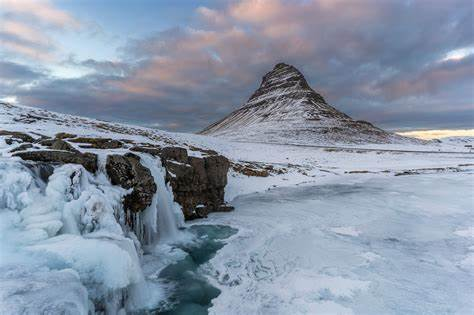

In [8]:
# display image with ToPILImage()
transforms.ToPILImage()(img_tensor)